In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("COPD.csv")
df.head()

,Name,Age (yrs),"Sex(m=0,f=1)","Cough(yes=1,no=0)","Breathe Shortness(yes=1,no=0)","Inhaler(yes=1,no=0)","Smoker(yes=1,no=0)","Wheeze(yes=1,no=0)","Chest pain(yes=1,no=0)","Respiration rate(child 24-40=1 or 0,adult 12-20=1 or 0)","FEV1/FVC (>70% 1, <34% 2, 60-69% 3,50-59% 4,35-49% 5)","FVC ( > = 80% 1, 80%> 2)",Occupation(industrial place=1 for not 0),Restless,"COPD(pos=1,neg=0)"
0,Amjad,50,0,1,1,1,1,1,0,0,2,2,0,1,1
1,Rafiq,48,0,1,1,0,0,0,1,1,1,1,1,1,0
2,Sattar Mia,55,0,1,1,0,1,1,1,1,0,4,2,0,1
3,Salam,56,0,1,1,1,0,0,0,1,5,2,0,1,1
4,Alom,50,0,1,1,1,1,0,1,0,4,2,0,1,1


In [4]:
df.columns

Index(['Name', 'Age (yrs)', 'Sex(m=0,f=1)', 'Cough(yes=1,no=0)',
       'Breathe Shortness(yes=1,no=0)', 'Inhaler(yes=1,no=0)',
       'Smoker(yes=1,no=0)', 'Wheeze(yes=1,no=0)', 'Chest pain(yes=1,no=0)',
       'Respiration rate(child 24-40=1 or  0,adult 12-20=1 or 0)',
       'FEV1/FVC (>70% 1, <34% 2, 60-69% 3,50-59% 4,35-49% 5)',
       'FVC ( > = 80% 1, 80%> 2)', 'Occupation(industrial place=1 for not 0)',
       'Restless', 'COPD(pos=1,neg=0)'],
      dtype='object')

In [8]:
df.dtypes

Name                                                        object
Age (yrs)                                                    int64
Sex(m=0,f=1)                                                 int64
Cough(yes=1,no=0)                                            int64
Breathe Shortness(yes=1,no=0)                                int64
Inhaler(yes=1,no=0)                                          int64
Smoker(yes=1,no=0)                                           int64
Wheeze(yes=1,no=0)                                           int64
Chest pain(yes=1,no=0)                                       int64
Respiration rate(child 24-40=1 or  0,adult 12-20=1 or 0)     int64
FEV1/FVC (>70% 1, <34% 2, 60-69% 3,50-59% 4,35-49% 5)        int64
FVC ( > = 80% 1, 80%> 2)                                     int64
Occupation(industrial place=1 for not 0)                     int64
Restless                                                     int64
COPD(pos=1,neg=0)                                            i

In [3]:
df['COPD(pos=1,neg=0)'].value_counts()

COPD(pos=1,neg=0)
1    53
0    48
Name: count, dtype: int64

<Axes: xlabel='COPD(pos=1,neg=0)', ylabel='count'>

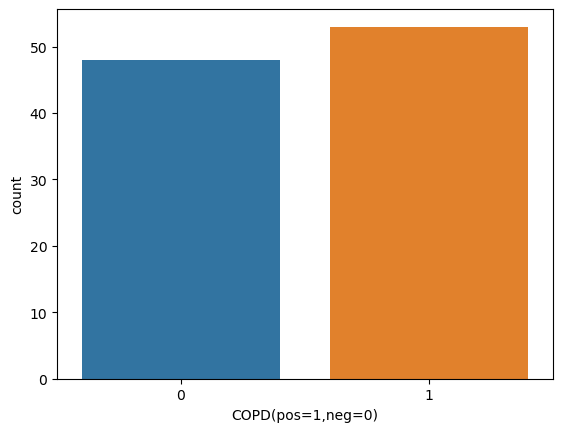

In [9]:
sns.countplot(x='COPD(pos=1,neg=0)', data=df)

In [10]:
df.isna().sum()

Name                                                        0
Age (yrs)                                                   0
Sex(m=0,f=1)                                                0
Cough(yes=1,no=0)                                           0
Breathe Shortness(yes=1,no=0)                               0
Inhaler(yes=1,no=0)                                         0
Smoker(yes=1,no=0)                                          0
Wheeze(yes=1,no=0)                                          0
Chest pain(yes=1,no=0)                                      0
Respiration rate(child 24-40=1 or  0,adult 12-20=1 or 0)    0
FEV1/FVC (>70% 1, <34% 2, 60-69% 3,50-59% 4,35-49% 5)       0
FVC ( > = 80% 1, 80%> 2)                                    0
Occupation(industrial place=1 for not 0)                    0
Restless                                                    0
COPD(pos=1,neg=0)                                           0
dtype: int64

In [15]:
# sns.countplot(x='Sex(m=0,f=1)',hue='COPD(pos=1,neg=0)',data=df)

In [16]:
df.describe()

,Age (yrs),"Sex(m=0,f=1)","Cough(yes=1,no=0)","Breathe Shortness(yes=1,no=0)","Inhaler(yes=1,no=0)","Smoker(yes=1,no=0)","Wheeze(yes=1,no=0)","Chest pain(yes=1,no=0)","Respiration rate(child 24-40=1 or 0,adult 12-20=1 or 0)","FEV1/FVC (>70% 1, <34% 2, 60-69% 3,50-59% 4,35-49% 5)","FVC ( > = 80% 1, 80%> 2)",Occupation(industrial place=1 for not 0),Restless,"COPD(pos=1,neg=0)"
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,50.930693,0.138614,0.970297,0.910891,0.405941,0.564356,0.574257,0.485149,0.465347,3.227723,1.534653,0.287129,0.841584,0.524752
std,11.834912,1.104805,0.170613,0.286322,0.493522,0.498314,0.496921,0.502272,0.557931,1.455206,0.592695,0.476165,0.366952,0.501878
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,52.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,0.000000,1.000000,1.000000
75%,60.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,1.000000,1.000000,1.000000
max,70.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,4.000000,2.000000,1.000000,1.000000


<Axes: xlabel='Sex(m=0,f=1)', ylabel='count'>

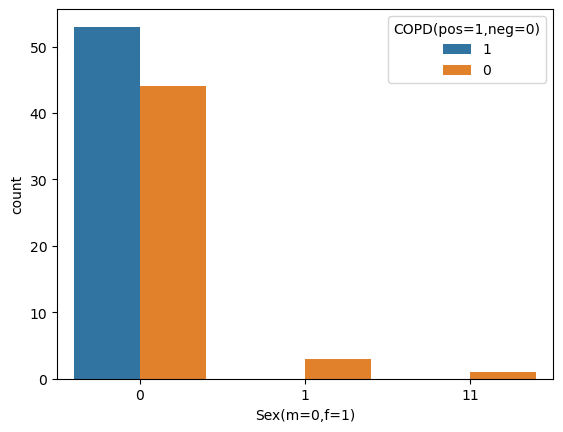

In [19]:
df['COPD(pos=1,neg=0)'] = df['COPD(pos=1,neg=0)'].astype(str)
sns.countplot(x='Sex(m=0,f=1)',hue='COPD(pos=1,neg=0)',data=df)

<Axes: xlabel='FEV1/FVC (>70% 1, <34% 2, 60-69% 3,50-59% 4,35-49% 5)', ylabel='count'>

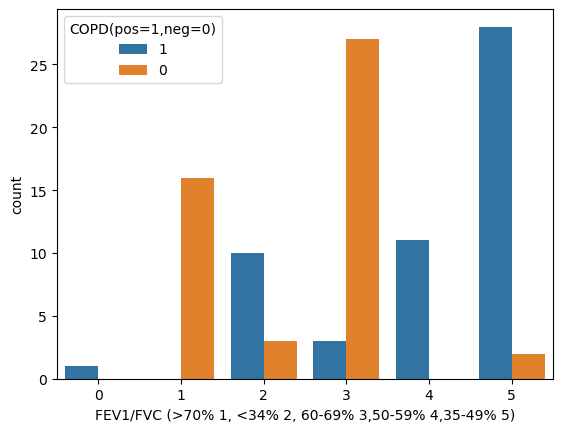

In [18]:
df['COPD(pos=1,neg=0)'] = df['COPD(pos=1,neg=0)'].astype(str)
sns.countplot(x='FEV1/FVC (>70% 1, <34% 2, 60-69% 3,50-59% 4,35-49% 5)',hue='COPD(pos=1,neg=0)',data=df)

In [20]:
df=df.drop(['Name'],axis=1)

In [21]:
df.corr()

,Age (yrs),"Sex(m=0,f=1)","Cough(yes=1,no=0)","Breathe Shortness(yes=1,no=0)","Inhaler(yes=1,no=0)","Smoker(yes=1,no=0)","Wheeze(yes=1,no=0)","Chest pain(yes=1,no=0)","Respiration rate(child 24-40=1 or 0,adult 12-20=1 or 0)","FEV1/FVC (>70% 1, <34% 2, 60-69% 3,50-59% 4,35-49% 5)","FVC ( > = 80% 1, 80%> 2)",Occupation(industrial place=1 for not 0),Restless,"COPD(pos=1,neg=0)"
Age (yrs),1.000000,-0.054324,0.028685,-0.010694,0.244558,0.083002,0.295901,0.002349,-0.269182,0.179764,0.307567,-0.168561,0.131000,0.413614
"Sex(m=0,f=1)",-0.054324,1.000000,0.022061,0.039437,-0.104231,-0.143514,0.053923,0.129893,0.478340,-0.169110,-0.282297,0.170704,0.054706,-0.132495
"Cough(yes=1,no=0)",0.028685,0.022061,1.000000,-0.054724,-0.211656,-0.036101,0.085251,-0.063546,-0.063448,0.067794,0.059726,-0.017062,0.083817,0.067065
"Breathe Shortness(yes=1,no=0)",-0.010694,0.039437,-0.054724,1.000000,0.187781,-0.204712,0.082114,0.095009,-0.050823,0.193193,0.283550,-0.177197,0.149835,0.189478
"Inhaler(yes=1,no=0)",0.244558,-0.104231,-0.211656,0.187781,1.000000,-0.046298,0.344780,-0.197315,-0.293414,0.245947,0.310392,-0.117970,0.082554,0.382948
"Smoker(yes=1,no=0)",0.083002,-0.143514,-0.036101,-0.204712,-0.046298,1.000000,0.212716,-0.145970,-0.414522,0.262288,0.288634,-0.057583,-0.217126,0.323444
"Wheeze(yes=1,no=0)",0.295901,0.053923,0.085251,0.082114,0.344780,0.212716,1.000000,-0.165817,-0.432469,0.190729,0.475009,-0.027617,0.119998,0.503796
"Chest pain(yes=1,no=0)",0.002349,0.129893,-0.063546,0.095009,-0.197315,-0.145970,-0.165817,1.000000,0.007066,-0.084257,0.094123,-0.086522,0.204134,0.051061
"Respiration rate(child 24-40=1 or 0,adult 12-20=1 or 0)",-0.269182,0.478340,-0.063448,-0.050823,-0.293414,-0.414522,-0.432469,0.007066,1.000000,-0.562911,-0.669182,0.019007,-0.173614,-0.737943
"FEV1/FVC (>70% 1, <34% 2, 60-69% 3,50-59% 4,35-49% 5)",0.179764,-0.169110,0.067794,0.193193,0.245947,0.262288,0.190729,-0.084257,-0.562911,1.000000,0.471922,-0.138602,0.086960,0.574129


In [22]:
X = df.drop("COPD(pos=1,neg=0)", axis=1)

y = df["COPD(pos=1,neg=0)"]

In [23]:
X.head()

,Age (yrs),"Sex(m=0,f=1)","Cough(yes=1,no=0)","Breathe Shortness(yes=1,no=0)","Inhaler(yes=1,no=0)","Smoker(yes=1,no=0)","Wheeze(yes=1,no=0)","Chest pain(yes=1,no=0)","Respiration rate(child 24-40=1 or 0,adult 12-20=1 or 0)","FEV1/FVC (>70% 1, <34% 2, 60-69% 3,50-59% 4,35-49% 5)","FVC ( > = 80% 1, 80%> 2)",Occupation(industrial place=1 for not 0),Restless
0,50,0,1,1,1,1,1,0,0,2,2,0,1
1,48,0,1,1,0,0,0,1,1,1,1,1,1
2,55,0,1,1,0,1,1,1,1,0,4,2,0
3,56,0,1,1,1,0,0,0,1,5,2,0,1
4,50,0,1,1,1,1,0,1,0,4,2,0,1


In [24]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: COPD(pos=1,neg=0), dtype: object

In [25]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [26]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTreeClassifier": DecisionTreeClassifier(),
          "Naive Bayes classifier": MultinomialNB()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [27]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 1.0,
 'KNN': 0.8571428571428571,
 'Random Forest': 1.0,
 'DecisionTreeClassifier': 0.7619047619047619,
 'Naive Bayes classifier': 0.9047619047619048}

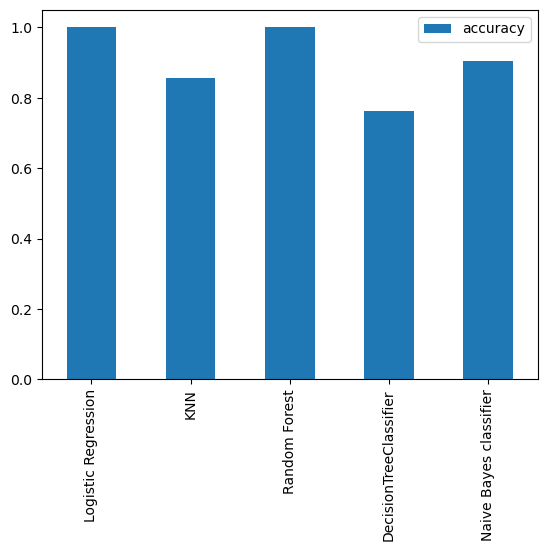

In [28]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [29]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=10)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
ytrain_pred_probablility = decision_tree.predict_proba(X_train)

ytest_pred_probablility = decision_tree.predict_proba(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))

[[ 7  0]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.71      0.83        14

    accuracy                           0.81        21
   macro avg       0.82      0.86      0.81        21
weighted avg       0.88      0.81      0.81        21

Accuracy score: 0.8095238095238095


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
ytrain_pred_probablility = knn_classifier.predict_proba(X_train)

ytest_pred_probablility = knn_classifier.predict_proba(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))

[[ 7  0]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       1.00      0.79      0.88        14

    accuracy                           0.86        21
   macro avg       0.85      0.89      0.85        21
weighted avg       0.90      0.86      0.86        21

Accuracy score: 0.8571428571428571


In [31]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(random_state=10)
Logistic.fit(X_train, y_train)
y_pred = Logistic.predict(X_test)
ytrain_pred_probablility = Logistic.predict_proba(X_train)

ytest_pred_probablility = Logistic.predict_proba(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))

[[ 7  0]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        14

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Accuracy score: 1.0


In [32]:
from sklearn.naive_bayes import MultinomialNB
NB= MultinomialNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
ytrain_pred_probablility = NB.predict_proba(X_train)

ytest_pred_probablility = NB.predict_proba(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))

[[ 5  2]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.88      1.00      0.93        14

    accuracy                           0.90        21
   macro avg       0.94      0.86      0.88        21
weighted avg       0.92      0.90      0.90        21

Accuracy score: 0.9047619047619048
